In [18]:
import myComponents as tc
import topic as tp
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import os

# network parameter
mode = 'PF'
delay_unit = 1

num_broker = 100
num_sub = 800
num_pub = 200
broker_r = 3000

broker_rates = [broker_r]*num_broker
topic_dist = [5,5,5,5,5]
monitor_rate = 1
runtime = 300
client_life = 60
connection_style = None

# sub parameter
avg_sub_size = 10.0
sub_r = 0.1

sub_rates = [sub_r]*num_sub
sub_num_topic = [100]*num_sub
sub_diameter = [8]*num_sub

# pub parameter
avg_pub_size = 20.0
pub_r = 1

pub_rates = [pub_r]*num_pub
pub_num_topic = [100]*num_pub
pub_diameter = [8]*num_pub


wildcard_rate=1
plus_rate=0.3
hash_rate=0.03


seed = 1

dir_name =str(delay_unit)+'_'+str(num_broker)+'_'+str(num_sub)+'_'+str(num_pub)+'_'+str(broker_r)+'_'+str(sub_r)+'_'+str(pub_r)+'_'+str(wildcard_rate*plus_rate)+'_'+str(wildcard_rate*hash_rate)
os.makedirs('./new_data/'+dir_name, exist_ok = True)

sub_waits = open('./new_data/'+dir_name+'/'+mode+'_'+'sub_waits.csv', 'w')
sub_pkt = open('./new_data/'+dir_name+'/'+mode+'_'+'sub_pkt.csv', 'w')
broker_queue = open('./new_data/'+dir_name+'/'+mode+'_'+'broker_queue.csv', 'w')
broker_output = open('./new_data/'+dir_name+'/'+mode+'_'+'broker_output.csv', 'w')
broker_sub = open('./new_data/'+dir_name+'/'+mode+'_'+'sub_queue.csv', 'w')
broker_pub = open('./new_data/'+dir_name+'/'+mode+'_'+'pub_queue.csv', 'w')

tc.SwitchPort.mode = mode
tc.SwitchPort.delay_unit = delay_unit

total_topic = tp.TopicTree(wildcard_rate, plus_rate, hash_rate)
total_topic.random_construct(topic_dist, seed)
#total_topic.visualize(total_topic.root)
net = tc.Network(total_topic, avg_sub_size, avg_pub_size, sub_waits, sub_pkt, broker_queue, broker_output, broker_sub, broker_pub, qlimit=None, debug=True)
net.initialize_nodes(broker_rates, sub_rates, sub_num_topic, sub_diameter, pub_rates, pub_num_topic, pub_diameter, monitor_rate, client_life, seed)
net.establish_topology(seed)
net.connect_client(connection_style, seed)
print(tc.SwitchPort.mode)
print(plus_rate)
print(hash_rate)


net.env.run(runtime)

sub_waits.close()
sub_pkt.close()
broker_queue.close()
broker_output.close()
broker_sub.close()
broker_pub.close()

initializing brokers
broker_id:  1
initializing sub
sub_id:  1
sub_id:  101
sub_id:  201
sub_id:  301
sub_id:  401
sub_id:  501
pub_id:  1
pub_id:  101
pub_id:  201
PF
0.3
0.03
current time:  5
current time:  10
current time:  15
current time:  20
current time:  25
current time:  30
current time:  35
current time:  40
current time:  45
current time:  50
current time:  55
current time:  60
current time:  65
current time:  70
current time:  75
current time:  80
current time:  85
current time:  90
current time:  95
current time:  100
current time:  105
current time:  110
current time:  115
current time:  120
current time:  125
current time:  130
current time:  135
current time:  140
current time:  145
current time:  150
current time:  155
current time:  160
current time:  165
current time:  170
current time:  175
current time:  180
current time:  185
current time:  190
current time:  195
current time:  200
current time:  205
current time:  210
current time:  215
current time:  220
current

Text(0.5, 1.0, 'pub queue length')

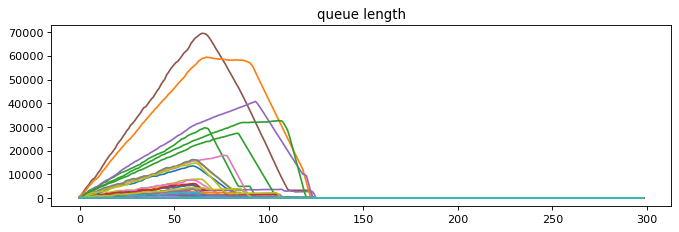

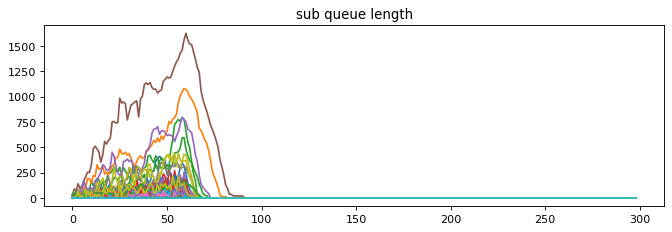

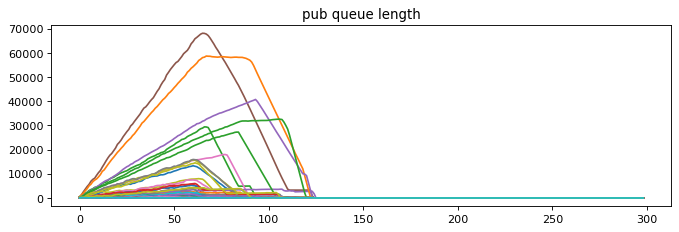

In [19]:
# net.visualize()
plt.figure(figsize=(10, 3), dpi=80)
#monitor.queue_size
#monitor.queue_length
for i in range(len(net.broker_monitor_list)):
    monitor = net.broker_monitor_list[i]
    plt.plot(monitor.queue_size, label=monitor.port.sp_id)
# plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.title("queue length")

plt.figure(figsize=(10, 3), dpi=80)
for i in range(len(net.broker_monitor_list)):
    monitor = net.broker_monitor_list[i]
    plt.plot(monitor.sub_queue, label=monitor.port.sp_id)
# plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.title("sub queue length")

plt.figure(figsize=(10, 3), dpi=80)
for i in range(len(net.broker_monitor_list)):
    monitor = net.broker_monitor_list[i]
    plt.plot(monitor.pub_queue, label=monitor.port.sp_id)
# plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.title("pub queue length")

In [23]:
import myComponents as tc
import topic as tp
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import os

# network parameter
mode = 'SF'
delay_unit = 1

num_broker = 100
num_sub = 800
num_pub = 200
broker_r = 3000

broker_rates = [broker_r]*num_broker
topic_dist = [5,5,5,5,5]
monitor_rate = 1
runtime = 300
client_life = 60
connection_style = None

# sub parameter
avg_sub_size = 10.0
sub_r = 1

sub_rates = [sub_r]*num_sub
sub_num_topic = [100]*num_sub
sub_diameter = [8]*num_sub

# pub parameter
avg_pub_size = 20.0
pub_r = 1

pub_rates = [pub_r]*num_pub
pub_num_topic = [100]*num_pub
pub_diameter = [8]*num_pub


wildcard_rate=1
plus_rate=0.3
hash_rate=0.03


seed = 1

dir_name =str(delay_unit)+'_'+str(num_broker)+'_'+str(num_sub)+'_'+str(num_pub)+'_'+str(broker_r)+'_'+str(sub_r)+'_'+str(pub_r)+'_'+str(wildcard_rate*plus_rate)+'_'+str(wildcard_rate*hash_rate)
os.makedirs('./new_data/'+dir_name, exist_ok = True)

sub_waits = open('./new_data/'+dir_name+'/'+mode+'_'+'sub_waits.csv', 'w')
sub_pkt = open('./new_data/'+dir_name+'/'+mode+'_'+'sub_pkt.csv', 'w')
broker_queue = open('./new_data/'+dir_name+'/'+mode+'_'+'broker_queue.csv', 'w')
broker_output = open('./new_data/'+dir_name+'/'+mode+'_'+'broker_output.csv', 'w')
broker_sub = open('./new_data/'+dir_name+'/'+mode+'_'+'sub_queue.csv', 'w')
broker_pub = open('./new_data/'+dir_name+'/'+mode+'_'+'pub_queue.csv', 'w')

tc.SwitchPort.mode = mode
tc.SwitchPort.delay_unit = delay_unit

total_topic = tp.TopicTree(wildcard_rate, plus_rate, hash_rate)
total_topic.random_construct(topic_dist, seed)
#total_topic.visualize(total_topic.root)
net = tc.Network(total_topic, avg_sub_size, avg_pub_size, sub_waits, sub_pkt, broker_queue, broker_output, broker_sub, broker_pub, qlimit=None, debug=True)
net.initialize_nodes(broker_rates, sub_rates, sub_num_topic, sub_diameter, pub_rates, pub_num_topic, pub_diameter, monitor_rate, client_life, seed)
net.establish_topology(seed)
net.connect_client(connection_style, seed)
print(tc.SwitchPort.mode)
print(plus_rate)
print(hash_rate)


net.env.run(runtime)

sub_waits.close()
sub_pkt.close()
broker_queue.close()
broker_output.close()
broker_sub.close()
broker_pub.close()

initializing brokers
broker_id:  1
initializing sub
sub_id:  1
sub_id:  101
sub_id:  201
sub_id:  301
sub_id:  401
sub_id:  501
sub_id:  601
sub_id:  701
pub_id:  1
pub_id:  101
SF
0.3
0.03
current time:  5
current time:  10
current time:  15
current time:  20
current time:  25
current time:  30
current time:  35
current time:  40
current time:  45
current time:  50
current time:  55
current time:  60
current time:  65
current time:  70
current time:  75
current time:  80
current time:  85
current time:  90
current time:  95
current time:  100
current time:  105
current time:  110
current time:  115
current time:  120
current time:  125
current time:  130
current time:  135
current time:  140
current time:  145
current time:  150
current time:  155
current time:  160
current time:  165
current time:  170
current time:  175
current time:  180
current time:  185
current time:  190
current time:  195
current time:  200
current time:  205
current time:  210
current time:  215
current time:

Text(0.5, 1.0, 'pub queue length')

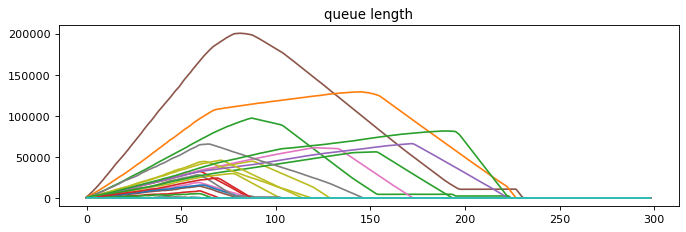

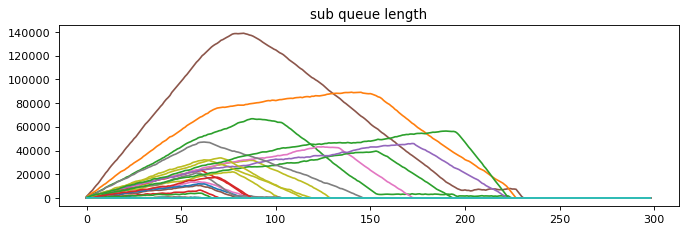

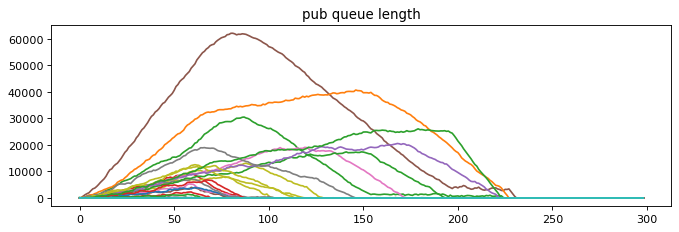

In [25]:
# net.visualize()
plt.figure(figsize=(10, 3), dpi=80)
#monitor.queue_size
#monitor.queue_length
for i in range(len(net.broker_monitor_list)):
    monitor = net.broker_monitor_list[i]
    plt.plot(monitor.queue_size, label=monitor.port.sp_id)
# plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.title("queue length")

plt.figure(figsize=(10, 3), dpi=80)
for i in range(len(net.broker_monitor_list)):
    monitor = net.broker_monitor_list[i]
    plt.plot(monitor.sub_queue, label=monitor.port.sp_id)
# plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.title("sub queue length")

plt.figure(figsize=(10, 3), dpi=80)
for i in range(len(net.broker_monitor_list)):
    monitor = net.broker_monitor_list[i]
    plt.plot(monitor.pub_queue, label=monitor.port.sp_id)
# plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.title("pub queue length")

KeyboardInterrupt: 

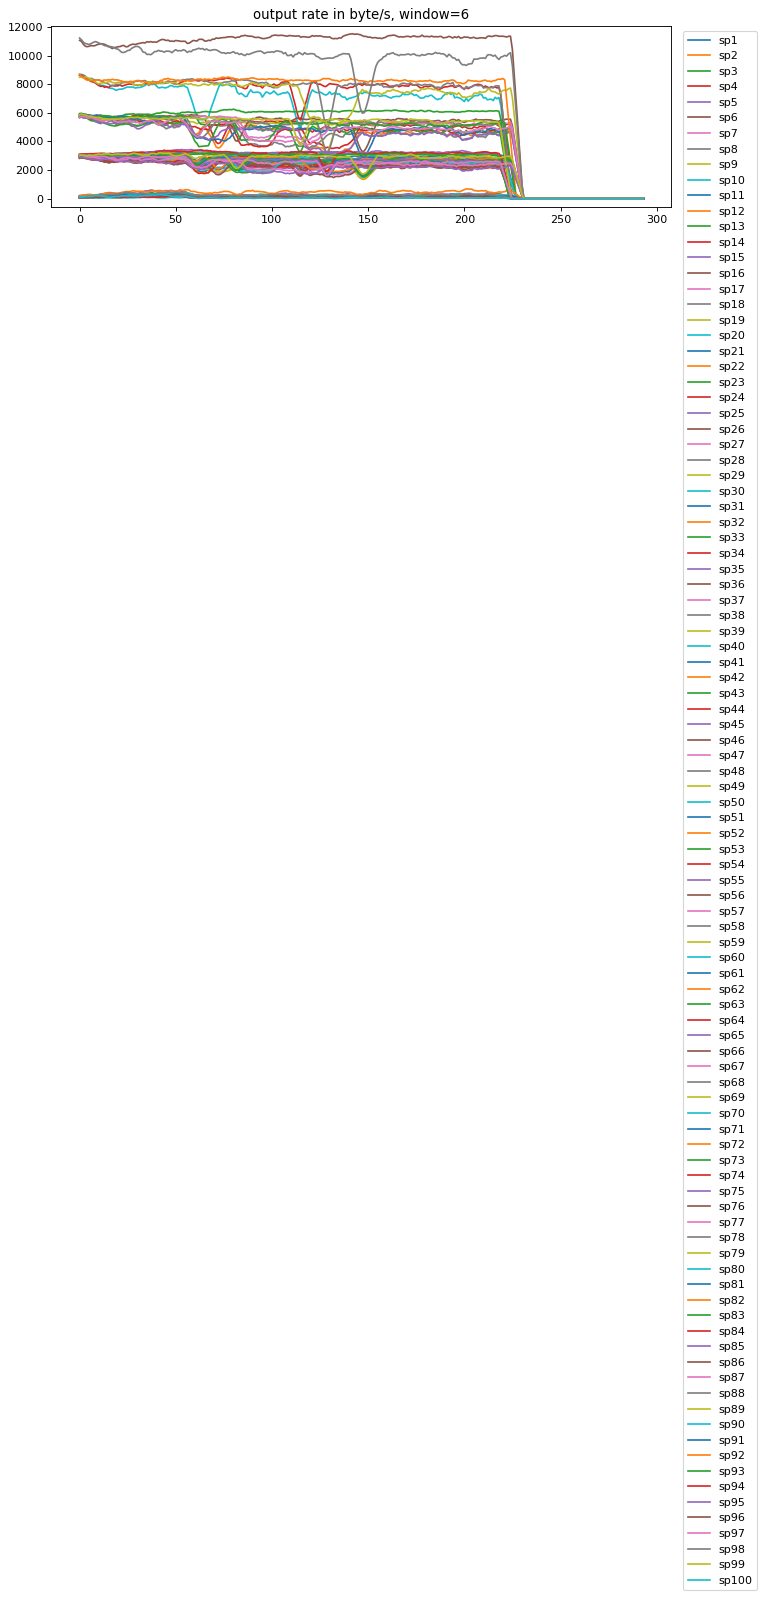

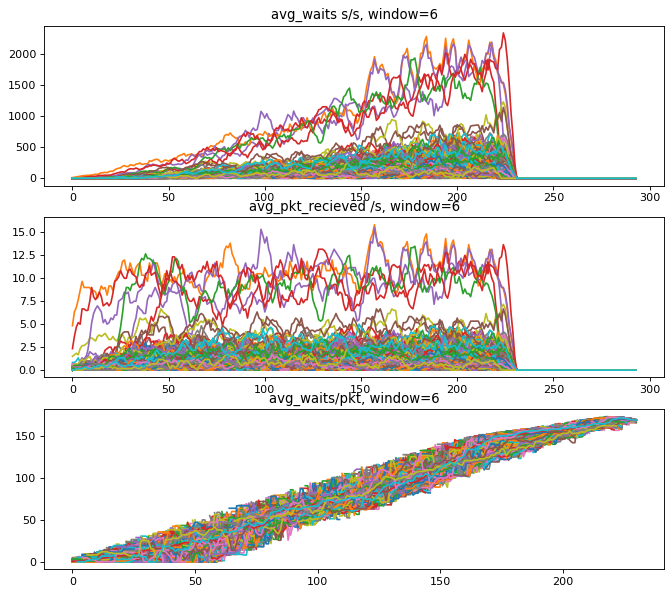

In [13]:
window = 6
plt.figure(figsize=(10, 3), dpi=80)
for i in range(len(net.broker_monitor_list)):
    monitor = net.broker_monitor_list[i]
    a = np.array(monitor.bytes_sent)
    b = np.array([0]*window+monitor.bytes_sent[0:-window])
    plt.plot((a-b)[window-1:]/window/monitor_rate, label=monitor.port.sp_id)
plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.title("output rate in byte/s, window="+str(window))

import warnings
warnings.filterwarnings('ignore')
window = 6
plt.figure(figsize=(10, 9), dpi=80)

for i in range(len(net.sub_monitor_list)):
    monitor = net.sub_monitor_list[i]
    a = np.array(monitor.packets_rec)
    b = np.array([0]*window+monitor.packets_rec[0:-window])
    avg_packet_rec_per_time = (a-b)[window-1:]/window/monitor_rate
    
    a = np.array(monitor.tot_waits)
    b = np.array([0]*window+monitor.tot_waits[0:-window])
    avg_waits_per_time = (a-b)[window-1:]/window/monitor_rate
    

    plt.subplot(311)
    plt.plot(avg_waits_per_time, label=monitor.client.client_id)
    plt.subplot(312)
    plt.plot(avg_packet_rec_per_time, label=monitor.client.client_id)
    plt.subplot(313)
    plt.plot(avg_waits_per_time/avg_packet_rec_per_time, label=monitor.client.client_id)

plt.subplot(311)
plt.title("avg_waits s/s, window="+str(window))
plt.subplot(312)
plt.title("avg_pkt_recieved /s, window="+str(window))
plt.subplot(313)
plt.title("avg_waits/pkt, window="+str(window))
plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)

In [29]:
list(a.values())

4

array(dict_values([1, 3]), dtype=object)

In [11]:
max(np.array([1,2,3])-np.array([2,3,4]))

-1